In [1]:
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import hypernetx.algorithms.contagion as contagion

## Create a hypergraph

In [17]:
n = 1000
m = 10000

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList, static=False)

## Initialize simulation variables
- $\tau$ is a dictionary of the infection rate for each hyperedge size
- $\gamma$ is the healing rate
- $t_{max}$ is the time at which to terminate the simulation if it hasn't already
- $\Delta t$ is the time step size to use for the discrete time algorithm

In [18]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 0.1

## Run the SIR epidemic simulations
- The discrete SIR takes fixed steps in time and multiple infection/healing events can happen at each time step.
- The Gillespie SIR algorithm takes steps in time exponentially distributed and at each step forward, a single event occurs
- As $\Delta t\to 0$, the discrete time algorithm converges to the Gillespie algorithm. 

In [19]:
start = time.time()
t1, S1, I1, R1 = contagion.discrete_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax, dt=dt)
print(time.time() - start)

start = time.time()
t2, S2, I2, R2 = contagion.Gillespie_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax)
print(time.time() - start)

7.918024778366089
0.1245880126953125


## Plot of the results
- Dashed lines are the results from the discrete time algorithm
- Solid lines are the results from the Gillespie algorithm
- Plots of the numbers susceptible, infected, and recovered over time

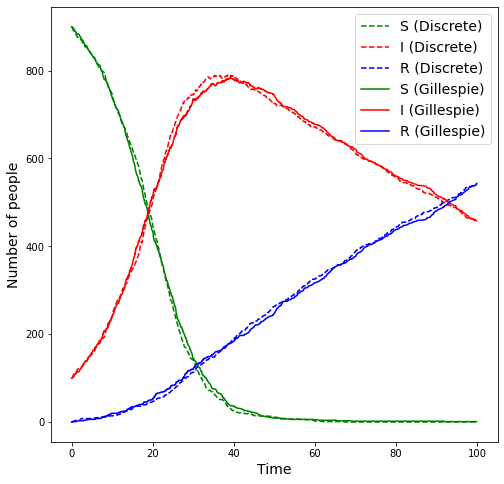

In [21]:
plt.figure()
plt.plot(t1, S1, 'g--', label='S (Discrete)')
plt.plot(t1, I1, 'r--', label='I (Discrete)')
plt.plot(t1, R1, 'b--', label='R (Discrete)')
plt.plot(t2, S2, 'g-', label='S (Gillespie)')
plt.plot(t2, I2, 'r-', label='I (Gillespie)')
plt.plot(t2, R2, 'b-', label='R (Gillespie)')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.legend(fontsize=14)
plt.savefig("sir.png", dpi=600)
plt.show()

## SIS Model
In this model, once individuals heal, they may become re-infected.

## Epidemic parameters

In [6]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 1

In [7]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
start = time.time()
t1, S1, I1 = contagion.discrete_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax, dt=dt)
print(time.time() - start)

start = time.time()
t2, S2, I2 = contagion.Gillespie_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax)
print(time.time() - start)

1.1875710487365723
0.23461604118347168


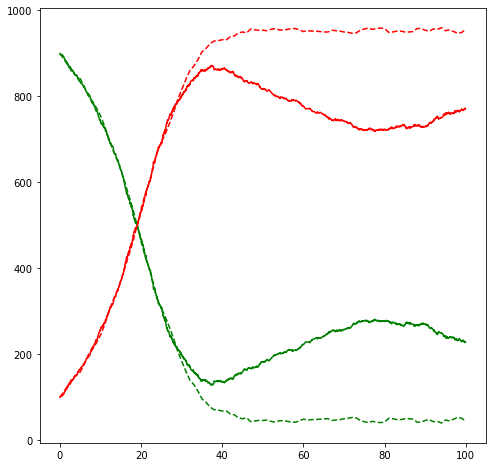

In [8]:
plt.figure()
plt.plot(t1, S1, 'g--')
plt.plot(t1, I1, 'r--')
plt.plot(t2, S2, 'g-')
plt.plot(t2, I2, 'r-')

plt.show()

## Animation of SIS model

In [22]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import random
import time
import hypernetx.algorithms.contagion as contagion
import numpy as np
from IPython.display import HTML

In [23]:
n = 100
m = 40

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList)
H = H.collapse_edges()

In [24]:
tau = {2:2, 3:1}
gamma = 0.1

In [25]:
transition_events = contagion.discrete_SIR(H, tau, gamma, rho=0.2, tmin=0, tmax=50, dt=1, return_full_data=True)

In [26]:
transition_events

{0: [('I', 49, None),
  ('I', 52, None),
  ('I', 39, None),
  ('I', 47, None),
  ('I', 23, None),
  ('I', 42, None),
  ('I', 78, None),
  ('I', 51, None),
  ('I', 8, None),
  ('I', 53, None),
  ('I', 58, None),
  ('I', 6, None)],
 1: [('I', 69, '4:1'),
  ('I', 88, '5:1'),
  ('I', 67, '6:1'),
  ('I', 62, '34:1'),
  ('I', 61, '13:1'),
  ('I', 33, '11:1'),
  ('I', 73, '39:1')],
 2: [('I', 66, '10:1'),
  ('I', 81, '8:1'),
  ('I', 97, '9:1'),
  ('I', 12, '23:1'),
  ('R', 47),
  ('I', 15, '19:1')],
 3: [('I', 77, '0:1'),
  ('I', 45, '2:1'),
  ('I', 20, '26:1'),
  ('I', 19, '31:1'),
  ('I', 68, '33:1'),
  ('R', 78)],
 4: [('I', 98, '12:1'), ('R', 12), ('R', 20), ('R', 19)],
 5: [('R', 88), ('R', 53), ('I', 16, '29:1')],
 6: [('R', 67), ('R', 97), ('R', 6), ('R', 52), ('I', 94, '37:1')],
 7: [('R', 42), ('R', 81), ('R', 16)],
 8: [('R', 68)],
 9: [],
 10: [('R', 62), ('R', 15)],
 11: [('R', 66), ('R', 58), ('R', 23), ('R', 94)],
 12: [('R', 69)],
 13: [('R', 61), ('R', 51)],
 14: [('R', 39), (

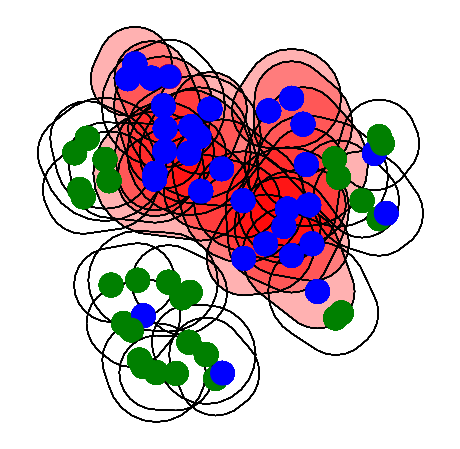

In [27]:
node_state_color_dict = {"S":"green", "I":"red", "R":"blue"}
edge_state_color_dict = {"S":(0, 1, 0, 0.3), "I":(1, 0, 0, 0.3), "R":(0, 0, 1, 0.3), "OFF": (1, 1, 1, 0)}

fps = 1

fig = plt.figure()
animation = contagion.contagion_animation(fig, H, transition_events, node_state_color_dict, edge_state_color_dict, node_radius=3, fps=fps)

In [28]:
HTML(animation.to_jshtml())